# Allen CCF, Coordinate System, 2015 Release ([ILX:0777134](http://uri.interlex.org/ilx_0777134))

The reference space or brain template was constructed as a unbiased shape and intensity population average of 1,675 young adult C57BL/6J mice brains imaged using serial two photon tomography (STPT) for the Allen Mouse Brain Connectivity Atlas ([Wang et al, 2020](https://pubmed.ncbi.nlm.nih.gov/32386544/)).

The axes the average template volume is a +X=Posterior, +Y=Inferior(Ventral) and +Z=Right frame with the origin at the corner of the volume.

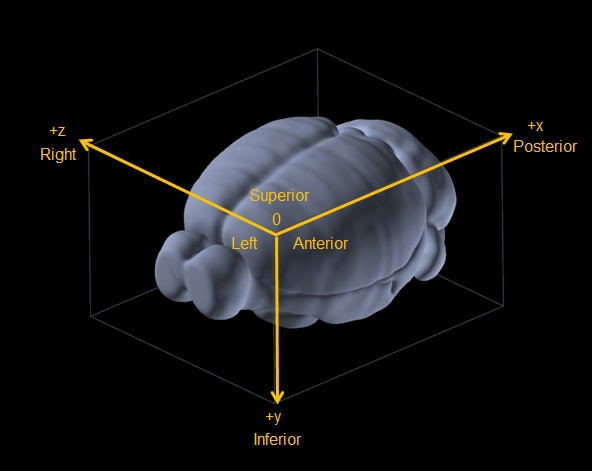


**The [volumetric files](http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/) initially released for the Allen CCF did not properly encode the direction and scale information.**

Standard medical imaging file formats typically define axis as a transformation from a patient-based right-handed coordinate frame (+X=Right,+Y=Anterior,+Z=Superior) and many tools assumes the unit to be in millimeters.

This script show how to modify the direction and spacing of CCF volumetric files to be compatible to common medical imaging tools such as [SimpleITK](https://simpleitk.readthedocs.io/en/master/index.html), [ITK-SNAP](http://www.itksnap.org/pmwiki/pmwiki.php), [NIFTI](http://niftilib.sourceforge.net/pynifti/intro.html) and [BIDS](https://bids.neuroimaging.io/index.html).

**The converted volumetric files can be download from this [location](http://download.alleninstitute.org/informatics-archive/converted_mouse_ccf/).**


In [1]:
import SimpleITK as sitk
import os

In [2]:
input_path = "C:/Users/lydia/Documents/Work/MouseBrainAnatomy/CCF data assets/mouse_ccf/average_template/"
output_path = "C:/Users/lydia/Documents/Work/MouseBrainAnatomy/CCF data assets/mouse_ccf_nii/average_template/"

In [3]:
if not os.path.exists(output_path) :
    os.makedirs(output_path)

In [4]:
#
# convert each file in the input directory
#
for f in os.scandir( input_path ):
    if f.path.endswith(".nrrd") and f.is_file():
        
        print("converting %s" % f.path)
        
        vol = sitk.ReadImage(f.path)
        
        #
        # Add in correction direction to transform between RAS to PIR
        #
        direction = [-0.0, 0.0, -1.0, 1.0, -0.0, 0.0, 0.0, -1.0, 0.0]
        vol.SetDirection( direction )
        
        #
        # Define scale relative to millimeters
        #
        spacing = [ x * 1e-3 for x in vol.GetSpacing()]
        vol.SetSpacing(spacing)
        
        #
        # save file to output directory
        #
        out_filename = os.path.splitext((os.path.basename(f.path)))[0] + ".nii.gz"
        out_filename = os.path.join( output_path, out_filename )

        #print("writing %s" % out_filename )
        sitk.WriteImage( vol, out_filename, True )
        

converting C:/Users/lydia/Documents/Work/MouseBrainAnatomy/CCF data assets/mouse_ccf/average_template/average_template_10.nrrd
converting C:/Users/lydia/Documents/Work/MouseBrainAnatomy/CCF data assets/mouse_ccf/average_template/average_template_100.nrrd
converting C:/Users/lydia/Documents/Work/MouseBrainAnatomy/CCF data assets/mouse_ccf/average_template/average_template_25.nrrd
converting C:/Users/lydia/Documents/Work/MouseBrainAnatomy/CCF data assets/mouse_ccf/average_template/average_template_50.nrrd


**The following images show screenshots of opening the before and after conversion CCF volumetric files in ITK-SNAP. Note the correction in orientation and scale in the converted image.**

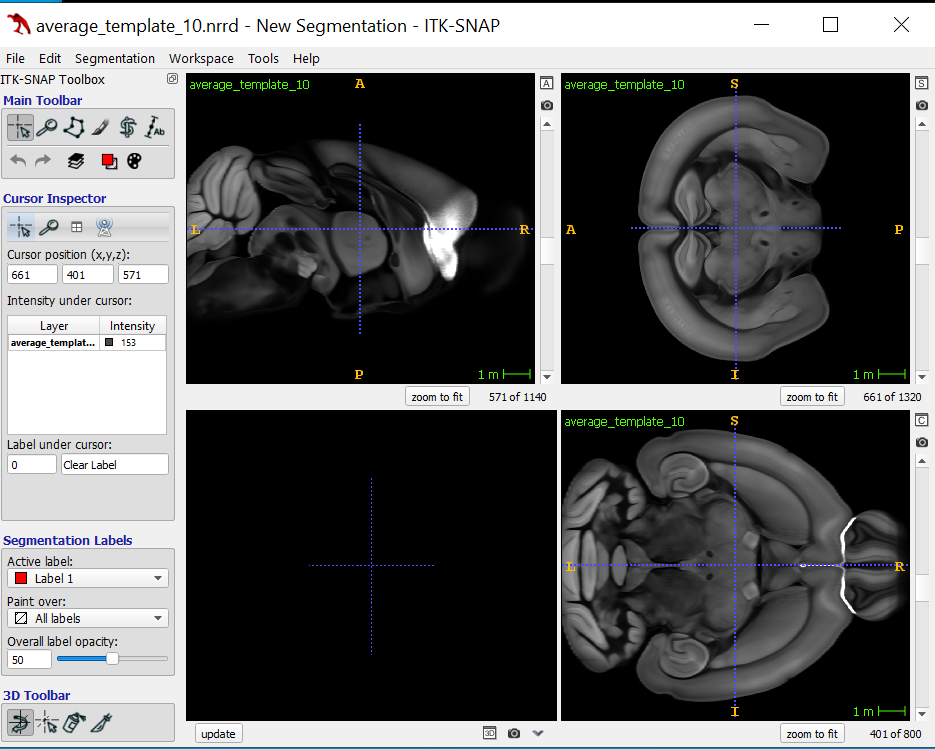
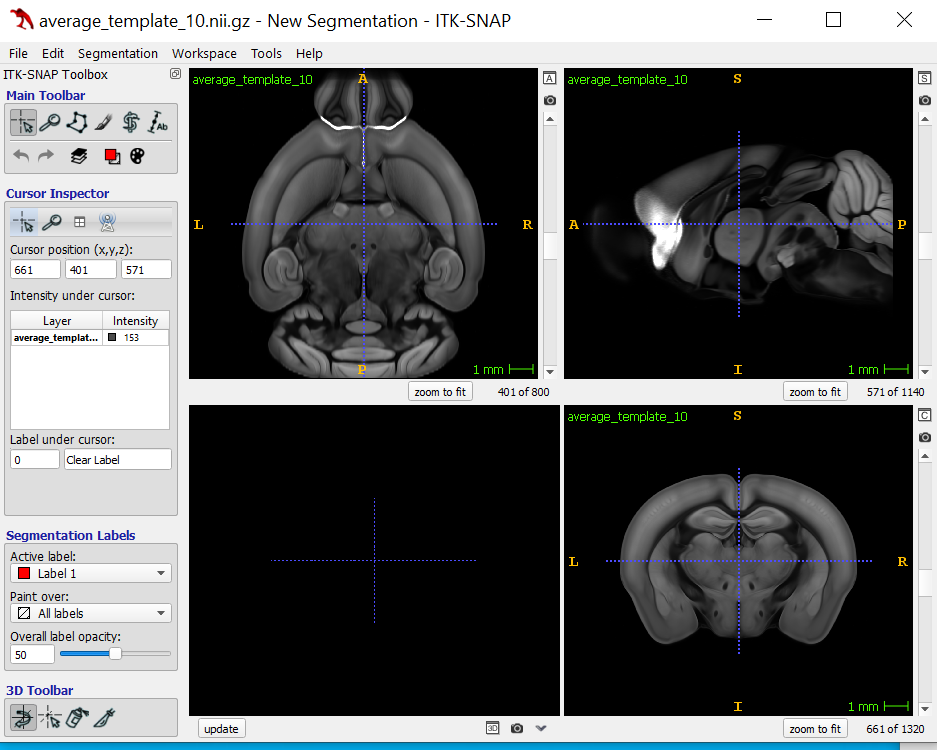
